In [1]:
pip install dlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
"""
Demonstration of the GazeTracking library.
Check the README.md for complete documentation.
"""

import cv2
from gaze_tracking import GazeTracking
import matplotlib.pyplot as plt
gaze = GazeTracking()
webcam = cv2.VideoCapture(0)
le_pupil=[]
ri_pupil=[]
while True:
    # We get a new frame from the webcam
    _, frame = webcam.read()

    # We send this frame to GazeTracking to analyze it
    gaze.refresh(frame)

    frame = gaze.annotated_frame()
    text = ""

    if gaze.is_blinking():
        text = "Blinking"
    elif gaze.is_right():
        text = "Looking right"
    elif gaze.is_left():
        text = "Looking left"
    elif gaze.is_center():
        text = "Looking center"

    cv2.putText(frame, text, (90, 60), cv2.FONT_HERSHEY_DUPLEX, 1.6, (147, 58, 31), 2)

    left_pupil = gaze.pupil_left_coords()
    right_pupil = gaze.pupil_right_coords()
    print(type(left_pupil))
    print(type(right_pupil))
    cv2.putText(frame, "Left pupil:  " + str(left_pupil), (90, 130), cv2.FONT_HERSHEY_DUPLEX, 0.9, (147, 58, 31), 1)
    cv2.putText(frame, "Right pupil: " + str(right_pupil), (90, 165), cv2.FONT_HERSHEY_DUPLEX, 0.9, (147, 58, 31), 1)
    
    #le_pupil=le_pupil.append(int(left_pupil))
    #ri_pupil=ri_pupil.append(int(right_pupil))
    
    #cv2.imshow("Demo", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
   
webcam.release()
cv2.destroyAllWindows()
#plt.plot(le_pupil,ri_pupil)
#plt.show()

<class 'NoneType'>
<class 'NoneType'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'NoneType'>
<class 'NoneType'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>


KeyboardInterrupt: 

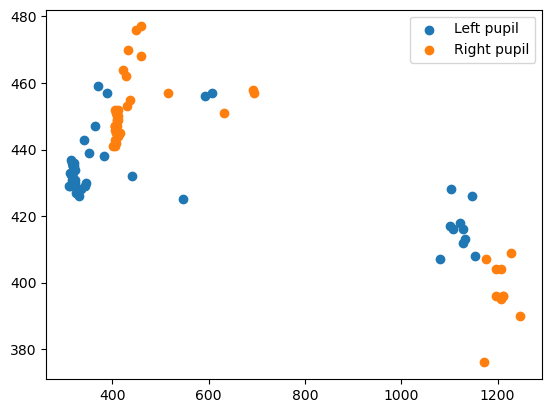

In [1]:
import cv2
from gaze_tracking import GazeTracking
import matplotlib.pyplot as plt

gaze = GazeTracking()
webcam = cv2.VideoCapture(0)

le_pupil=[]
ri_pupil=[]

while True:
    # We get a new frame from the webcam
    _, frame = webcam.read()

    # We send this frame to GazeTracking to analyze it
    gaze.refresh(frame)

    frame = gaze.annotated_frame()
    text = ""

    if gaze.is_blinking():
        text = "Blinking"
    elif gaze.is_right():
        text = "Looking right"
    elif gaze.is_left():
        text = "Looking left"
    elif gaze.is_center():
        text = "Looking center"

    cv2.putText(frame, text, (90, 60), cv2.FONT_HERSHEY_DUPLEX, 1.6, (147, 58, 31), 2)

    left_pupil = gaze.pupil_left_coords()
    right_pupil = gaze.pupil_right_coords()

    if left_pupil is not None:
        le_pupil.append(left_pupil)
    if right_pupil is not None:
        ri_pupil.append(right_pupil)

    cv2.putText(frame, "Left pupil:  " + str(left_pupil), (90, 130), cv2.FONT_HERSHEY_DUPLEX, 0.9, (147, 58, 31), 1)
    cv2.putText(frame, "Right pupil: " + str(right_pupil), (90, 165), cv2.FONT_HERSHEY_DUPLEX, 0.9, (147, 58, 31), 1)

    cv2.imshow("Demo", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()

# Plotting
le_x, le_y = zip(*le_pupil)
ri_x, ri_y = zip(*ri_pupil)

plt.scatter(le_x, le_y, label='Left pupil')
plt.scatter(ri_x, ri_y, label='Right pupil')
plt.legend()
plt.show()


In [ ]:
from flask import Flask, jsonify, render_template
import cv2
from gaze_tracking import GazeTracking

app = Flask(__name__)

gaze = GazeTracking()
webcam = cv2.VideoCapture(0)

le_pupil=[]
ri_pupil=[]


@app.route('/')
def index():
    return render_template('index_gt.html')

@app.route('/video_feed')
def video_feed():
    def generate():
        while True:
            # We get a new frame from the webcam
            _, frame = webcam.read()

            # We send this frame to GazeTracking to analyze it
            gaze.refresh(frame)

            frame = gaze.annotated_frame()
            text = ""

            if gaze.is_blinking():
                text = "Blinking"
            elif gaze.is_right():
                text = "Looking right"
            elif gaze.is_left():
                text = "Looking left"
            elif gaze.is_center():
                text = "Looking center"

            cv2.putText(frame, text, (90, 60), cv2.FONT_HERSHEY_DUPLEX, 1.6, (147, 58, 31), 2)

            left_pupil = gaze.pupil_left_coords()
            right_pupil = gaze.pupil_right_coords()

            if left_pupil is not None:
                le_pupil.append(left_pupil)
            if right_pupil is not None:
                ri_pupil.append(right_pupil)

            cv2.putText(frame, "Left pupil:  " + str(left_pupil), (90, 130), cv2.FONT_HERSHEY_DUPLEX, 0.9, (147, 58, 31), 1)
            cv2.putText(frame, "Right pupil: " + str(right_pupil), (90, 165), cv2.FONT_HERSHEY_DUPLEX, 0.9, (147, 58, 31), 1)

            cv2.imshow("Demo", frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

            # Yield the current frame as an image/jpeg response
            yield (b'--frame\r\n'
                   b'Content-Type: image/jpeg\r\n\r\n' + cv2.imencode('.jpg', frame)[1].tobytes() + b'\r\n')

    return Response(generate(), mimetype='multipart/x-mixed-replace; boundary=frame')

@app.route('/pupil_coords')
def pupil_coords():
    # Return left and right pupil coordinates
    le_x, le_y = zip(*le_pupil)
    ri_x, ri_y = zip(*ri_pupil)
    coords = {"left_pupil": {"x": list(le_x), "y": list(le_y)}, "right_pupil": {"x": list(ri_x), "y": list(ri_y)}}
    return jsonify(coords)

if __name__ == '__main__':
    app.run(debug=True)
